# Guide to Data Exploration and NaN Imputation

In [1]:
## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [3]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [4]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [5]:
df.drop(columns=['beer_abv'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_beerid         1586614 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 145.3+ MB


In [7]:
review_count_threshold = 2
users = df.groupby('review_profilename').count()
users = users.loc[users['beer_name'] >= review_count_threshold]
users_to_keep = list(users.index)
df = df.loc[df['review_profilename'].isin(users_to_keep)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575823 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1575823 non-null  int64  
 1   brewery_name        1575808 non-null  object 
 2   review_time         1575823 non-null  int64  
 3   review_overall      1575823 non-null  float64
 4   review_aroma        1575823 non-null  float64
 5   review_appearance   1575823 non-null  float64
 6   review_profilename  1575823 non-null  object 
 7   beer_style          1575823 non-null  object 
 8   review_palate       1575823 non-null  float64
 9   review_taste        1575823 non-null  float64
 10  beer_name           1575823 non-null  object 
 11  beer_beerid         1575823 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 156.3+ MB


In [8]:
beers = df.drop_duplicates(subset='beer_beerid')
beers['complete_beer_name'] = beers.brewery_name + ' Brewery ' + beers.beer_name
beers = beers[['beer_beerid','complete_beer_name','beer_style']]
beers


C:\Users\kapta\AppData\Local\Temp\ipykernel_7728\524607950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers['complete_beer_name'] = beers.brewery_name + ' Brewery ' + beers.beer_name


,beer_beerid,complete_beer_name,beer_style
0,47986,Vecchio Birraio Brewery Sausa Weizen,Hefeweizen
1,48213,Vecchio Birraio Brewery Red Moon,English Strong Ale
2,48215,Vecchio Birraio Brewery Black Horse Black Beer,Foreign / Export Stout
3,47969,Vecchio Birraio Brewery Sausa Pils,German Pilsener
4,64883,Caldera Brewing Company Brewery Cauldron DIPA,American Double / Imperial IPA
...,...,...,...
1586594,38160,The Defiant Brewing Company Brewery Highland P...,American Porter
1586595,71234,The Defiant Brewing Company Brewery Baron Von ...,Hefeweizen
1586596,48360,The Defiant Brewing Company Brewery Resolution #2,Belgian Strong Pale Ale
1586599,43233,The Defiant Brewing Company Brewery Double IPA,American Double / Imperial IPA


In [9]:
df = df[['review_profilename','beer_beerid','review_overall']]
df['review_overall'] = df.review_overall.astype('float16')
df['beer_beerid'] = df.beer_beerid.astype('int16')
df.drop_duplicates(subset = ['review_profilename','beer_beerid'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559577 entries, 0 to 1586613
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   review_profilename  1559577 non-null  object 
 1   beer_beerid         1559577 non-null  int16  
 2   review_overall      1559577 non-null  float16
dtypes: float16(1), int16(1), object(1)
memory usage: 29.7+ MB


In [10]:
from surprise import Dataset, Reader
from surprise import SVD # implementation of Funk's SVD
from surprise import accuracy # metric
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV #train/test splits, etc

In [11]:
reader = Reader()#line_format='user rating item', sep=',')
data = Dataset.load_from_df(df, reader=reader)

trainset, testset = train_test_split(data, test_size=.2, random_state = 42)

In [27]:
data.df

,review_profilename,beer_beerid,review_overall
0,stcules,-17550,1.5
1,stcules,-17323,3.0
2,stcules,-17321,3.0
3,stcules,-17567,3.0
4,johnmichaelsen,-653,4.0
...,...,...,...
1586609,maddogruss,-32475,5.0
1586610,yelterdow,-32475,4.0
1586611,TongoRad,-32475,4.5
1586612,dherling,-32475,4.0


In [12]:
# params = {'n_factors': [11],
#          'reg_all': [0.008]}
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=20)
# g_s_svd.fit(data)

In [13]:
# print(g_s_svd.best_score)
# print(g_s_svd.best_params)

In [25]:
trainset.

<bound method Trainset.all_items of <surprise.trainset.Trainset object at 0x00000170209F5070>>

In [14]:
svd = SVD(reg_all = .05, lr_all = 0.008, n_factors = 11, n_epochs = 65)
svd.fit(trainset)

In [15]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.6034


0.6034088631185888

In [16]:
from bs4 import BeautifulSoup

In [17]:
with open('ratings_jeff.htm') as f:
    soup = BeautifulSoup(f, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="Public NoJs uix_javascriptNeedsInit LoggedIn Sidebar Responsive pageIsLtr not_hasTabLinks hasSearch is-sidebarOpen hasRightSidebar is-setWidth navStyle_0 pageStyle_0 hasFlexbox" dir="LTR" id="XenForo" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <base href="https://www.beeradvocate.com/community/"/>
  <script>
   var _b = document.getElementsByTagName('base')[0], _bH = "https://www.beeradvocate.com/community/";
			if (_b && _b.href != _bH) _b.href = _bH;
  </script>
  <title>
   Beer Ratings: kaptain_kompost | BeerAdvocate
  </title>
  <noscript>
   <style>
    .JsOnly, .jsOnly { display: none !important; }
   </style>
  </noscript>
  <link href="css.php?css=xenforo,form,public&amp;style=6&amp;dir=LTR&amp;d=1665714331" rel="stylesheet"/>
  <link href="css.php?css=moderator

In [18]:
print(soup.body)

<body>
<div class="js-uix_panels uix_panels">
<aside class="js-sidePanelWrapper sidePanelWrapper sidePanelWrapper--left">
<a class="js-panelMask uix_panelMask" href="#"></a>
<div class="sidePanel sidePanel--nav">
<nav>
<ul class="sidePanel__navTabs">
<li class="navTab Home">
<a class="navLink" href="/">Home</a>
<a class="SplitCtrl" href="/"><i class="uix_icon js-offcanvasIcon uix_icon-expandDropdown"></i></a>
<div class="tabLinks">
<ul class="secondaryContent blockLinksList">
<li><a href="/community/threads/about-beeradvocate.666170/">About Us</a></li>
<li><a href="/contact/">Contact Us</a></li>
<li><a href="/community/threads/what-happened-to-the-beeradvocate-logo.660933/">New Logo?!</a></li>
</ul>
</div>
</li>
<li class="navTab forums">
<a class="navLink" href="https://www.beeradvocate.com/community/">Forums</a>
<a class="SplitCtrl" href="https://www.beeradvocate.com/community/"><i class="uix_icon js-offcanvasIcon uix_icon-expandDropdown"></i></a>
<div class="tabLinks">
<ul class="bl

In [19]:
soup.body.find_all('tr')[3].find_all('a')[0].attrs['href']

'/beer/profile/72/763/?ba=kaptain_kompost#lists'

In [20]:
preceding_tr = 3
beer_body_tr = soup.body.find_all('tr')
beer_list = beer_body_tr[preceding_tr:]
beer_url = beer_list[0].a.attrs['href']
beer_id = beer_url.split('/')[4]
print(beer_id)
print(beer_body_tr[3].find_all('b')[-1])


763
<b>3.47</b>


In [37]:
def extract_ratings(preceding_tr,html_file):
    with open(html_file) as f:
        soup = BeautifulSoup(f, 'html.parser')
    beer_names = []
    beer_ratings = []
    beer_body_tr = soup.body.find_all('tr')
    beer_list = beer_body_tr[preceding_tr:]
    for i,v in enumerate(beer_list):
        beer_url = v.a.attrs['href']
        beer_id = beer_url.split('/')[4]
        beer_names.append(beer_id)
        beer_rating = beer_body_tr[i+preceding_tr].find_all('b')[-1].text
        beer_ratings.append(beer_rating)
        data = pd.DataFrame({'review_profilename':'user','beer_beerid': beer_names,'review_overall': beer_ratings})
        data['beer_beerid'] = data.beer_beerid.astype('int32')
        data['review_overall'] = data.review_overall.astype('float16')
    return(data)


In [38]:
my_df = extract_ratings(3,'ratings_jeff.htm')
my_df

,review_profilename,beer_beerid,review_overall
0,user,763,3.470703
1,user,171,3.929688
2,user,2755,3.750000
3,user,1320,1.000000
4,user,236,4.750000
5,user,639,4.250000
6,user,52077,1.500000
7,user,837,1.500000
8,user,1276,2.250000
9,user,6715,4.250000


In [40]:
user_data = Dataset.load_from_df(my_df, reader=reader)

In [41]:
recommendation = svd.test(user_data)

TypeError: 'DatasetAutoFolds' object is not iterable

In [12]:
frame = pd.DataFrame(df.dtypes)
categoricals = list(frame.loc[frame.iloc[:,0]=='object'].iloc[:,0].keys())
for col in categoricals:
    print(col,"\n",df[col].value_counts().sort_values().sort_values(ascending=False),"\n")

review_profilename 
 northyorksammy    5782
BuckeyeNation     4653
mikesgroove       4559
Thorpe429         3517
womencantsail     3489
                  ... 
Malt                 7
JavelinPride         7
germanbeerluvr       7
Taera                7
paKIRK               5
Name: review_profilename, Length: 11883, dtype: int64 



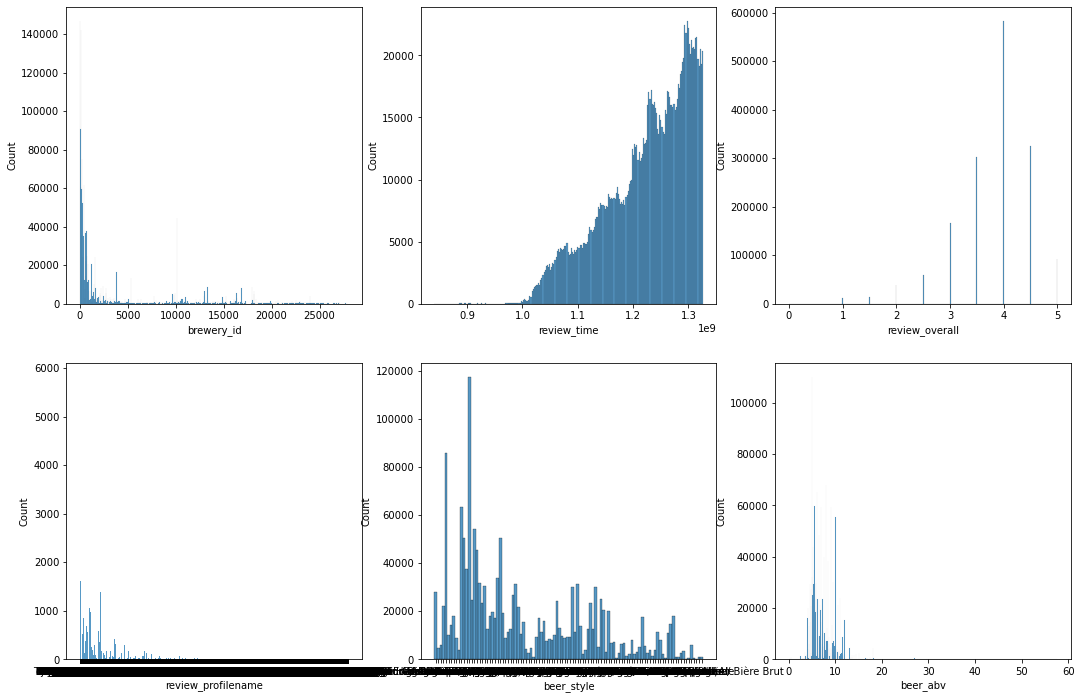

In [6]:
exclude_list = ['beer_name','brewery_name','review_aroma','review_appearance','review_palate','review_taste','beer_beerid']
frame = df.loc[:, ~df.columns.isin(exclude_list)]
cols = 3
rows = int(len(frame.columns) / cols) + int(len(frame.columns) % cols > 0)
f = plt.figure(figsize=(18,6*rows))
for i, col in enumerate(frame.columns):
    f.add_subplot(rows, cols, i+1)
    sns.histplot(frame[col])
plt.show()

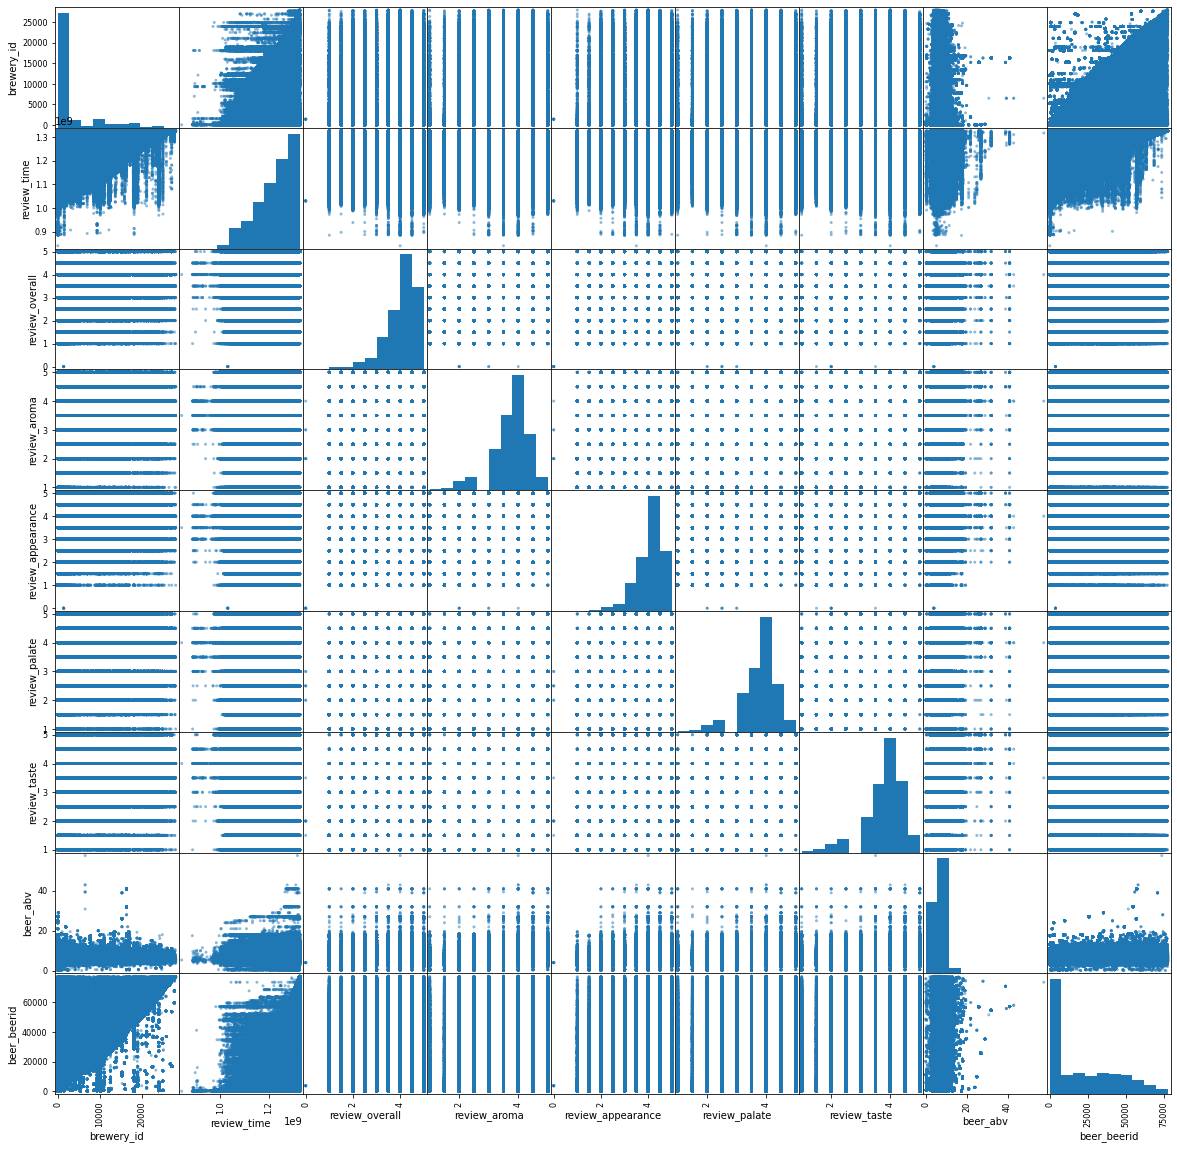

In [7]:
pd.plotting.scatter_matrix(df,figsize = (20,20));

In [8]:
def mean_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mean(),inplace = True)

def median_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mean(),inplace = True)

def mode_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mode(),inplace = True)

def drop_columns(d_frame):
    for x in col_list:
        d_frame.drop(labels = x,axis = 1)

def create_dummy_nan(d_frame,col_list):
    for x in col_list:
        d_frame['missing_'+x] = d_frame[x].apply(lambda v: pd.isna(v)*1)
        d_frame[x].fillna(0,inplace=True)

def drop_remaining_rows_nan(d_frame):
    d_frame.dropna(axis=0, how='any',inplace = True)

In [11]:
data = df
x = 'review_time'
y = 'review_overall'
title_size = 30
label_size = 15


sns.set_context("talk")
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.barplot(ax=ax, data=data, x=x, y=y)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

p.set_xlabel('String',fontsize=label_size)
p.set_ylabel('String',fontsize=label_size)
p.set_title('String',fontsize=title_size)
